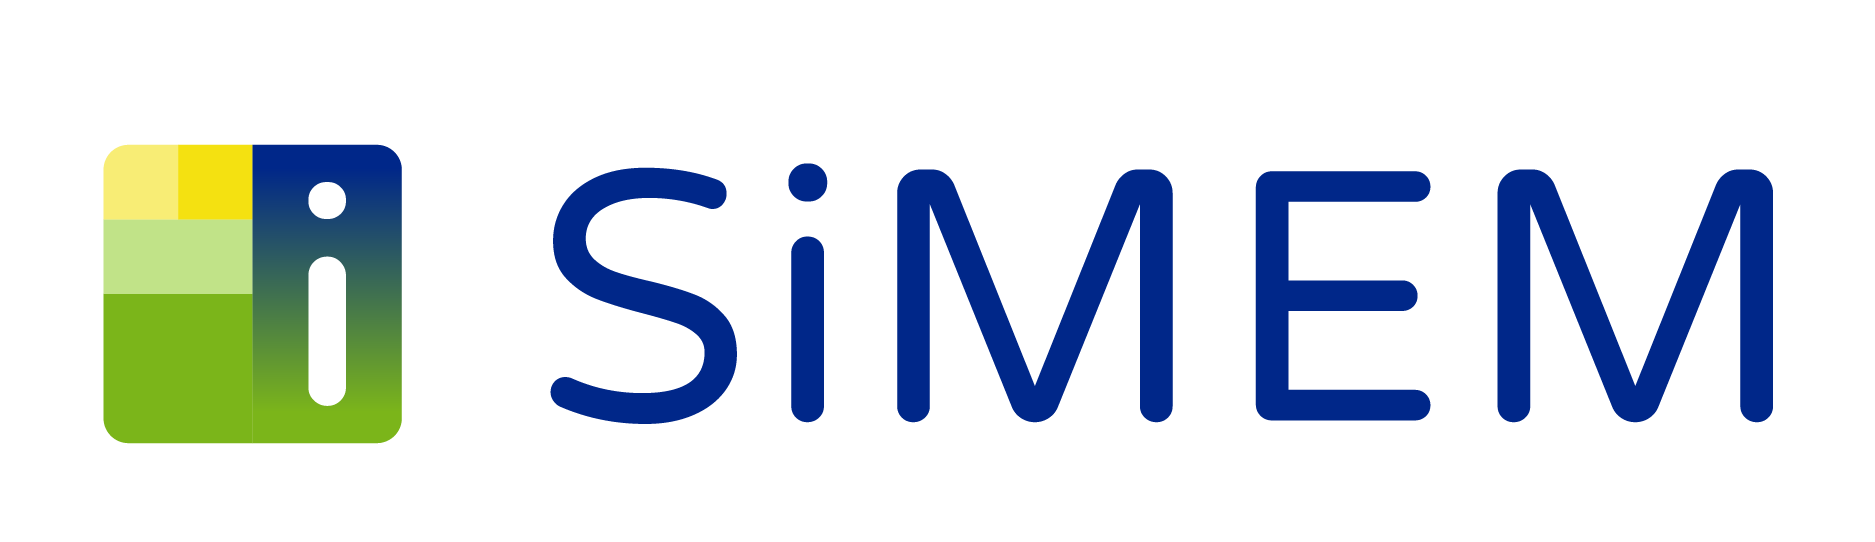

[SiMEM](https://www.simem.co/)

## Caso de uso - Asignaciones de OEF por planta

# Objetivos de este notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto

**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)


<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías


In [2]:
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
# import matplotlib.pyplot as plt             # Para crear gráficos estáticos como barras, líneas, histogramas, etc.
# import seaborn as sns                       # Librería basada en matplotlib para visual
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as go           # Módulo de Plotly para crear visualizaciones interactivas y personalizadas, como gráficos de líneas, barras, áreas, etc.
# import numpy as np

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Asignaciones de OEF por planta](https://www.simem.co/datadetail/306C6790-E645-4966-8031-5A5658D8B962).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [3]:
id_dataset = '306c67'                                       # ID del conjunto de datos a consultar
fecha_inicial = '2025-12-01'                                # Fecha de inicio del rango de consulta
fecha_final = '2032-11-30'                                  # Fecha de fin del rango de consulta
simem = ReadSIMEM(id_dataset, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_dataset = simem.main()                                   # Ejecución del método principal para obtener los datos en un DataFrame
df_dataset.head(5)                                          # Visualización de las primeras 5 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Asignaciones de OEF por planta"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0018849372863769531
Extraccion de registros: 2.7290267944335938
End of data extracting process
****************************************************************************************************


,FechaPublicacion,FechaInicioCargo,FechaFinCargo,CodigoSICAgente,CodigoPlanta,Tecnologia,OEF
0,2025-08-04,2030-12-01,2031-11-30,ISGG,SMI1,Filo de Agua,1.226750e+08
1,2025-08-04,2030-12-01,2031-11-30,SOLG,PRMA,Solar,3.292118e+07
2,2025-08-04,2030-12-01,2031-11-30,EPMG,SNFR,Filo de Agua,3.366979e+07
3,2025-08-04,2030-12-01,2031-11-30,GECG,GE32,Termica,1.971000e+09
4,2025-08-04,2030-12-01,2031-11-30,PSXG,POMA,Solar,2.877295e+07


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

### Filtrar la máxima versión para el periodo de consulta de los datos, es decir, la fecha de publicación mas reciente de las proyecciones

In [4]:
df_dataset = df_dataset.sort_values('FechaPublicacion', ascending=False)                            # Se ordena por FechaPublicacion descendente

df_dataset = df_dataset.drop_duplicates(subset=[
    'CodigoPlanta', 'FechaInicioCargo', 'FechaFinCargo'], keep='first').reset_index(drop=True)      # Se eliminan los duplicados manteniendo el más reciente por grupo
df_dataset

,FechaPublicacion,FechaInicioCargo,FechaFinCargo,CodigoSICAgente,CodigoPlanta,Tecnologia,OEF
0,2025-08-04,2030-12-01,2031-11-30,ISGG,SMI1,Filo de Agua,1.226750e+08
1,2025-08-04,2026-03-01,2026-03-31,EMUG,URA1,Hidraulica,0.000000e+00
2,2025-08-04,2026-04-01,2026-04-30,SLUG,3IZ6,Solar,7.390757e+04
3,2025-08-04,2026-04-01,2026-04-30,EPMG,SNFR,Hidraulica,0.000000e+00
4,2025-08-04,2026-04-01,2026-04-30,EPMG,PRC3,Hidraulica,0.000000e+00
...,...,...,...,...,...,...,...
806,2025-08-04,2027-12-01,2028-11-30,ORQG,ODEA,Solar,1.262070e+08
807,2025-08-04,2027-12-01,2028-11-30,EPMG,TSR1,Termica,2.789146e+09
808,2025-08-04,2027-12-01,2028-11-30,TBSG,TBQ4,Termica,4.672674e+08
809,2025-08-04,2027-12-01,2028-11-30,BRZG,BOSA,Solar,7.714475e+07


Mensualización de los datos

In [5]:
# fechas en formato datetime
df_dataset['FechaInicioCargo'] = pd.to_datetime(df_dataset['FechaInicioCargo'])
df_dataset['FechaFinCargo'] = pd.to_datetime(df_dataset['FechaFinCargo'])

# Diccionario para acumular energía por mes
energia_mensual = {}

# Procesar cada fila del DataFrame
for _, row in df_dataset.iterrows():
    fecha_ini = row['FechaInicioCargo']
    fecha_fin = row['FechaFinCargo']
    energia_total = row['OEF']
    
    # Generar lista de meses en el rango
    meses = []
    fecha_actual = fecha_ini
    while fecha_actual <= fecha_fin:
        meses.append(fecha_actual.strftime("%Y-%m"))
        fecha_actual += relativedelta(months=1)
    
    energia_por_mes = energia_total / len(meses)
    
    for mes in meses:
        energia_mensual[mes] = energia_mensual.get(mes, 0) + energia_por_mes

# Convertir a DataFrame para graficar
df_mensual = pd.DataFrame(list(energia_mensual.items()), columns=["Mes", "Energia"])
df_mensual["Mes"] = pd.to_datetime(df_mensual["Mes"])
df_mensual = df_mensual.sort_values("Mes")

millon = 1000000
df_mensual['Energia'] = df_mensual['Energia'].div(millon)

<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

### Obligacion de energia firme acumulada mensualmente

In [6]:
fig = go.Figure(data=[                                  # Se crea la gráfica de barras
    go.Bar(
        x=df_mensual['Mes'],                     # Valores Eje X
        y=df_mensual['Energia'],                 # Valores Eje Y
        marker_color='skyblue'                       # Color del gráfico
    )
])

fig.update_layout(                                      # Configurar el diseño del gráfico
    title='Obligaciones de energía firme por mes',  # Título del gráfico
    xaxis_title='Mes',                        # Título Eje X
    yaxis_title='GW-mes',                                  # Título Eje Y
    template='plotly_white'
)

fig.show()                                              # Se muestra el gráfico